In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
salary  = pd.read_excel('/Users/d.mkhlnk/Downloads/Salary.xlsx')
inflation = pd.read_excel('/Users/d.mkhlnk/Documents/Inflation_rate.xlsx')

In [3]:
salary.head()

,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,...,63695,69936,74474.1,83178,89343.7,95359,103473.5,118375.7,131588.4,156081.8
1,Строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,...,29960,32332,33677.9,38518,42629.9,44738,51944.2,60849.5,71707.0,85606.3
2,Образование,1240.2,1833.0,2927.3,3386.6,4203.4,5429.7,6983.3,8778.3,11316.8,...,26928,28088,30257.6,34361,37071.9,39563,43390.5,48400.2,54314.8,62914.6


In [4]:
salary = salary.transpose().reset_index()



In [5]:
salary = salary.rename({'index':'year', 0:'Добыча полезных ископаемых', 1:'Строительство', 2:'Образование'}, axis =1)
salary = salary.drop(index=0)

In [6]:
salary.head()

,year,Добыча полезных ископаемых,Строительство,Образование
1,2000,5940.2,2639.8,1240.2
2,2001,9099.2,3859.3,1833.0
3,2002,11080.9,4806.9,2927.3
4,2003,13912.4,6176.7,3386.6
5,2004,16841.7,7304.7,4203.4


In [7]:
inflation_2016 = inflation[inflation['year']>=2016]
inflation_before_2016 = inflation[inflation['year']<2016]
inflation.head()

,year,inflation_rate
0,1991,160.40
1,1992,2508.85
2,1993,839.87
3,1994,215.02
4,1995,131.33


In [8]:
def cpi (inflation):
    inflation = list(inflation)
    for i in range (len(inflation)):
        if i == 0:
            inflation[i] = 1
        else:
            cpi = inflation[i-1]*(1 + inflation[i]/100)
            inflation[i] = cpi
    return inflation

    

In [9]:
inflation_2016['cpi'] = cpi(inflation_2016['inflation_rate'])

/var/folders/3_/t25c274s2dd06j97r5rn8pp40000gn/T/ipykernel_56524/27835980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation_2016['cpi'] = cpi(inflation_2016['inflation_rate'])


In [10]:
inflation_2016

,year,inflation_rate,cpi
25,2016,5.38,1.000000
26,2017,2.52,1.025200
27,2018,4.27,1.068976
28,2019,3.05,1.101580
29,2020,4.91,1.155667
30,2021,8.39,1.252628
31,2022,11.92,1.401941
32,2023,7.42,1.505965
33,2024,9.51,1.649182


In [11]:
def discount (inflation):
    inflation = list(inflation)
    for i in range (len(inflation)):
        if i == 0:
            discount_rate  = (1+inflation[i]/100)
            cpi = (1 / discount_rate )
            inflation[i] = cpi
        else:
            discount_rate = discount_rate*(1+inflation[i]/100)
            cpi = 1/discount_rate
            inflation[i] = cpi
    return inflation

    

In [12]:
inflation_before_2016 = inflation_before_2016.sort_values(by = 'year', ascending=False)
inflation_before_2016['cpi'] = discount(inflation_before_2016['inflation_rate'])

In [13]:
inflation_before_2016 = inflation_before_2016.sort_values(by = 'year', ascending=True)
inflation = pd.concat([inflation_2016, inflation_before_2016]).sort_values(by = 'year', ascending = True)
inflation = inflation[inflation['year']>=2000].reset_index()
inflation

,index,year,inflation_rate,cpi
0,9,2000,20.20,0.177554
1,10,2001,18.58,0.213420
2,11,2002,15.06,0.253074
3,12,2003,11.99,0.291187
4,13,2004,11.74,0.326100
5,14,2005,10.91,0.364384
6,15,2006,9.00,0.404139
7,16,2007,11.87,0.440511
8,17,2008,13.28,0.492800
9,18,2009,8.80,0.558243


In [14]:
salary = salary.merge(inflation[['year', 'cpi']], on = 'year', how = 'inner')

In [15]:
salary['Minearal_mining_adj'] = salary['Добыча полезных ископаемых']/salary['cpi']
salary['Construction_adj'] = salary['Строительство']/salary['cpi']
salary['Education_adj'] = salary['Образование']/salary['cpi']
salary.head()

,year,Добыча полезных ископаемых,Строительство,Образование,cpi,Minearal_mining_adj,Construction_adj,Education_adj
0,2000,5940.2,2639.8,1240.2,0.177554,33455.666728,14867.558168,6984.902508
1,2001,9099.2,3859.3,1833.0,0.213420,42635.107763,18083.092073,8588.683899
2,2002,11080.9,4806.9,2927.3,0.253074,43785.240923,18994.059561,11566.978833
3,2003,13912.4,6176.7,3386.6,0.291187,47778.267115,21212.157679,11630.335486
4,2004,16841.7,7304.7,4203.4,0.326100,51645.801393,22400.178452,12889.907882


### Динамика номинальных заработных плат 

Text(0.5, 1.0, 'Динамика номинальных заработных плат в секторе строительства')

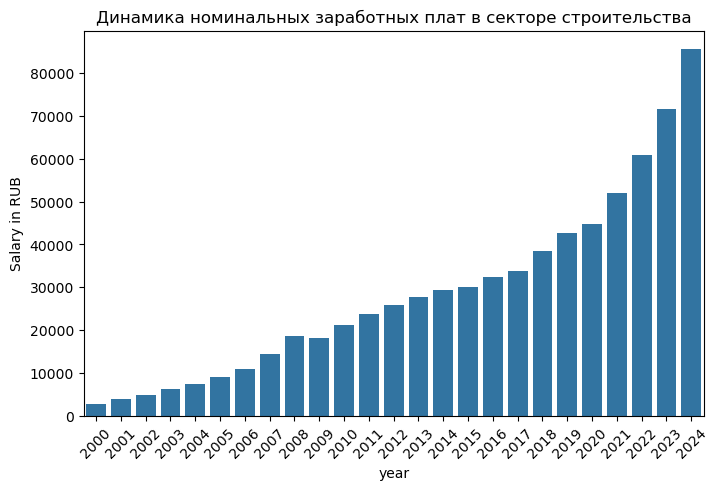

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(data = salary, x = 'year', y = 'Строительство')
plt.xticks(rotation = 45);
plt.ylabel('Salary in RUB')
plt.title('Динамика номинальных заработных плат в секторе строительства')


Text(0.5, 1.0, 'Динамика номинальных заработных плат в секторе строительства')

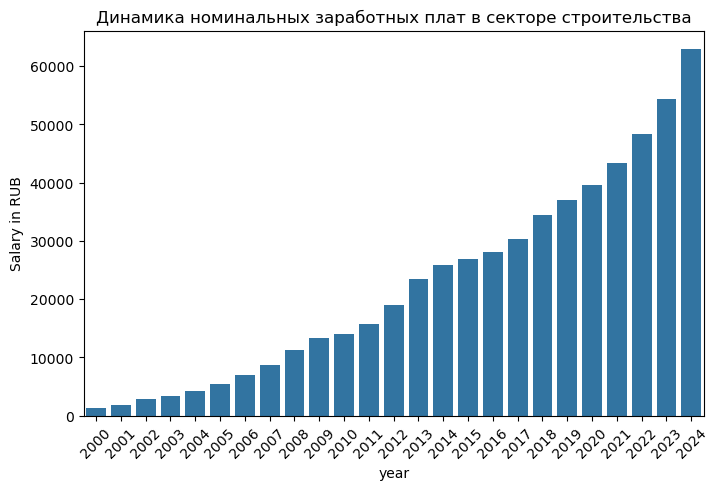

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data = salary, x = 'year', y = 'Образование')
plt.xticks(rotation = 45);
plt.ylabel('Salary in RUB')
plt.title('Динамика номинальных заработных плат в секторе строительства')


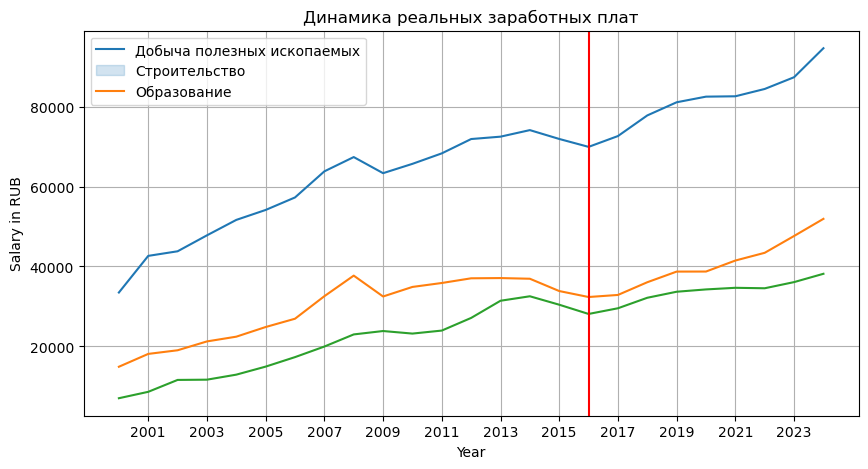

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(data = salary, x  = 'year', y = 'Minearal_mining_adj')
sns.lineplot(data = salary, x  = 'year', y = 'Construction_adj')
sns.lineplot(data = salary, x  = 'year', y = 'Education_adj')
plt.ylabel('Salary in RUB')
plt.xlabel('Year')
plt.legend(['Добыча полезных ископаемых', 'Строительство', 'Образование'])
plt.title('Динамика реальных заработных плат')
plt.xticks(np.arange(2001, max(salary['year']), 2));
plt.axvline(x = 2016, c = 'r')
plt.grid()

In [19]:
salary.head()

,year,Добыча полезных ископаемых,Строительство,Образование,cpi,Minearal_mining_adj,Construction_adj,Education_adj
0,2000,5940.2,2639.8,1240.2,0.177554,33455.666728,14867.558168,6984.902508
1,2001,9099.2,3859.3,1833.0,0.213420,42635.107763,18083.092073,8588.683899
2,2002,11080.9,4806.9,2927.3,0.253074,43785.240923,18994.059561,11566.978833
3,2003,13912.4,6176.7,3386.6,0.291187,47778.267115,21212.157679,11630.335486
4,2004,16841.7,7304.7,4203.4,0.326100,51645.801393,22400.178452,12889.907882


### Сравнение номинальной и реальной заработной платы


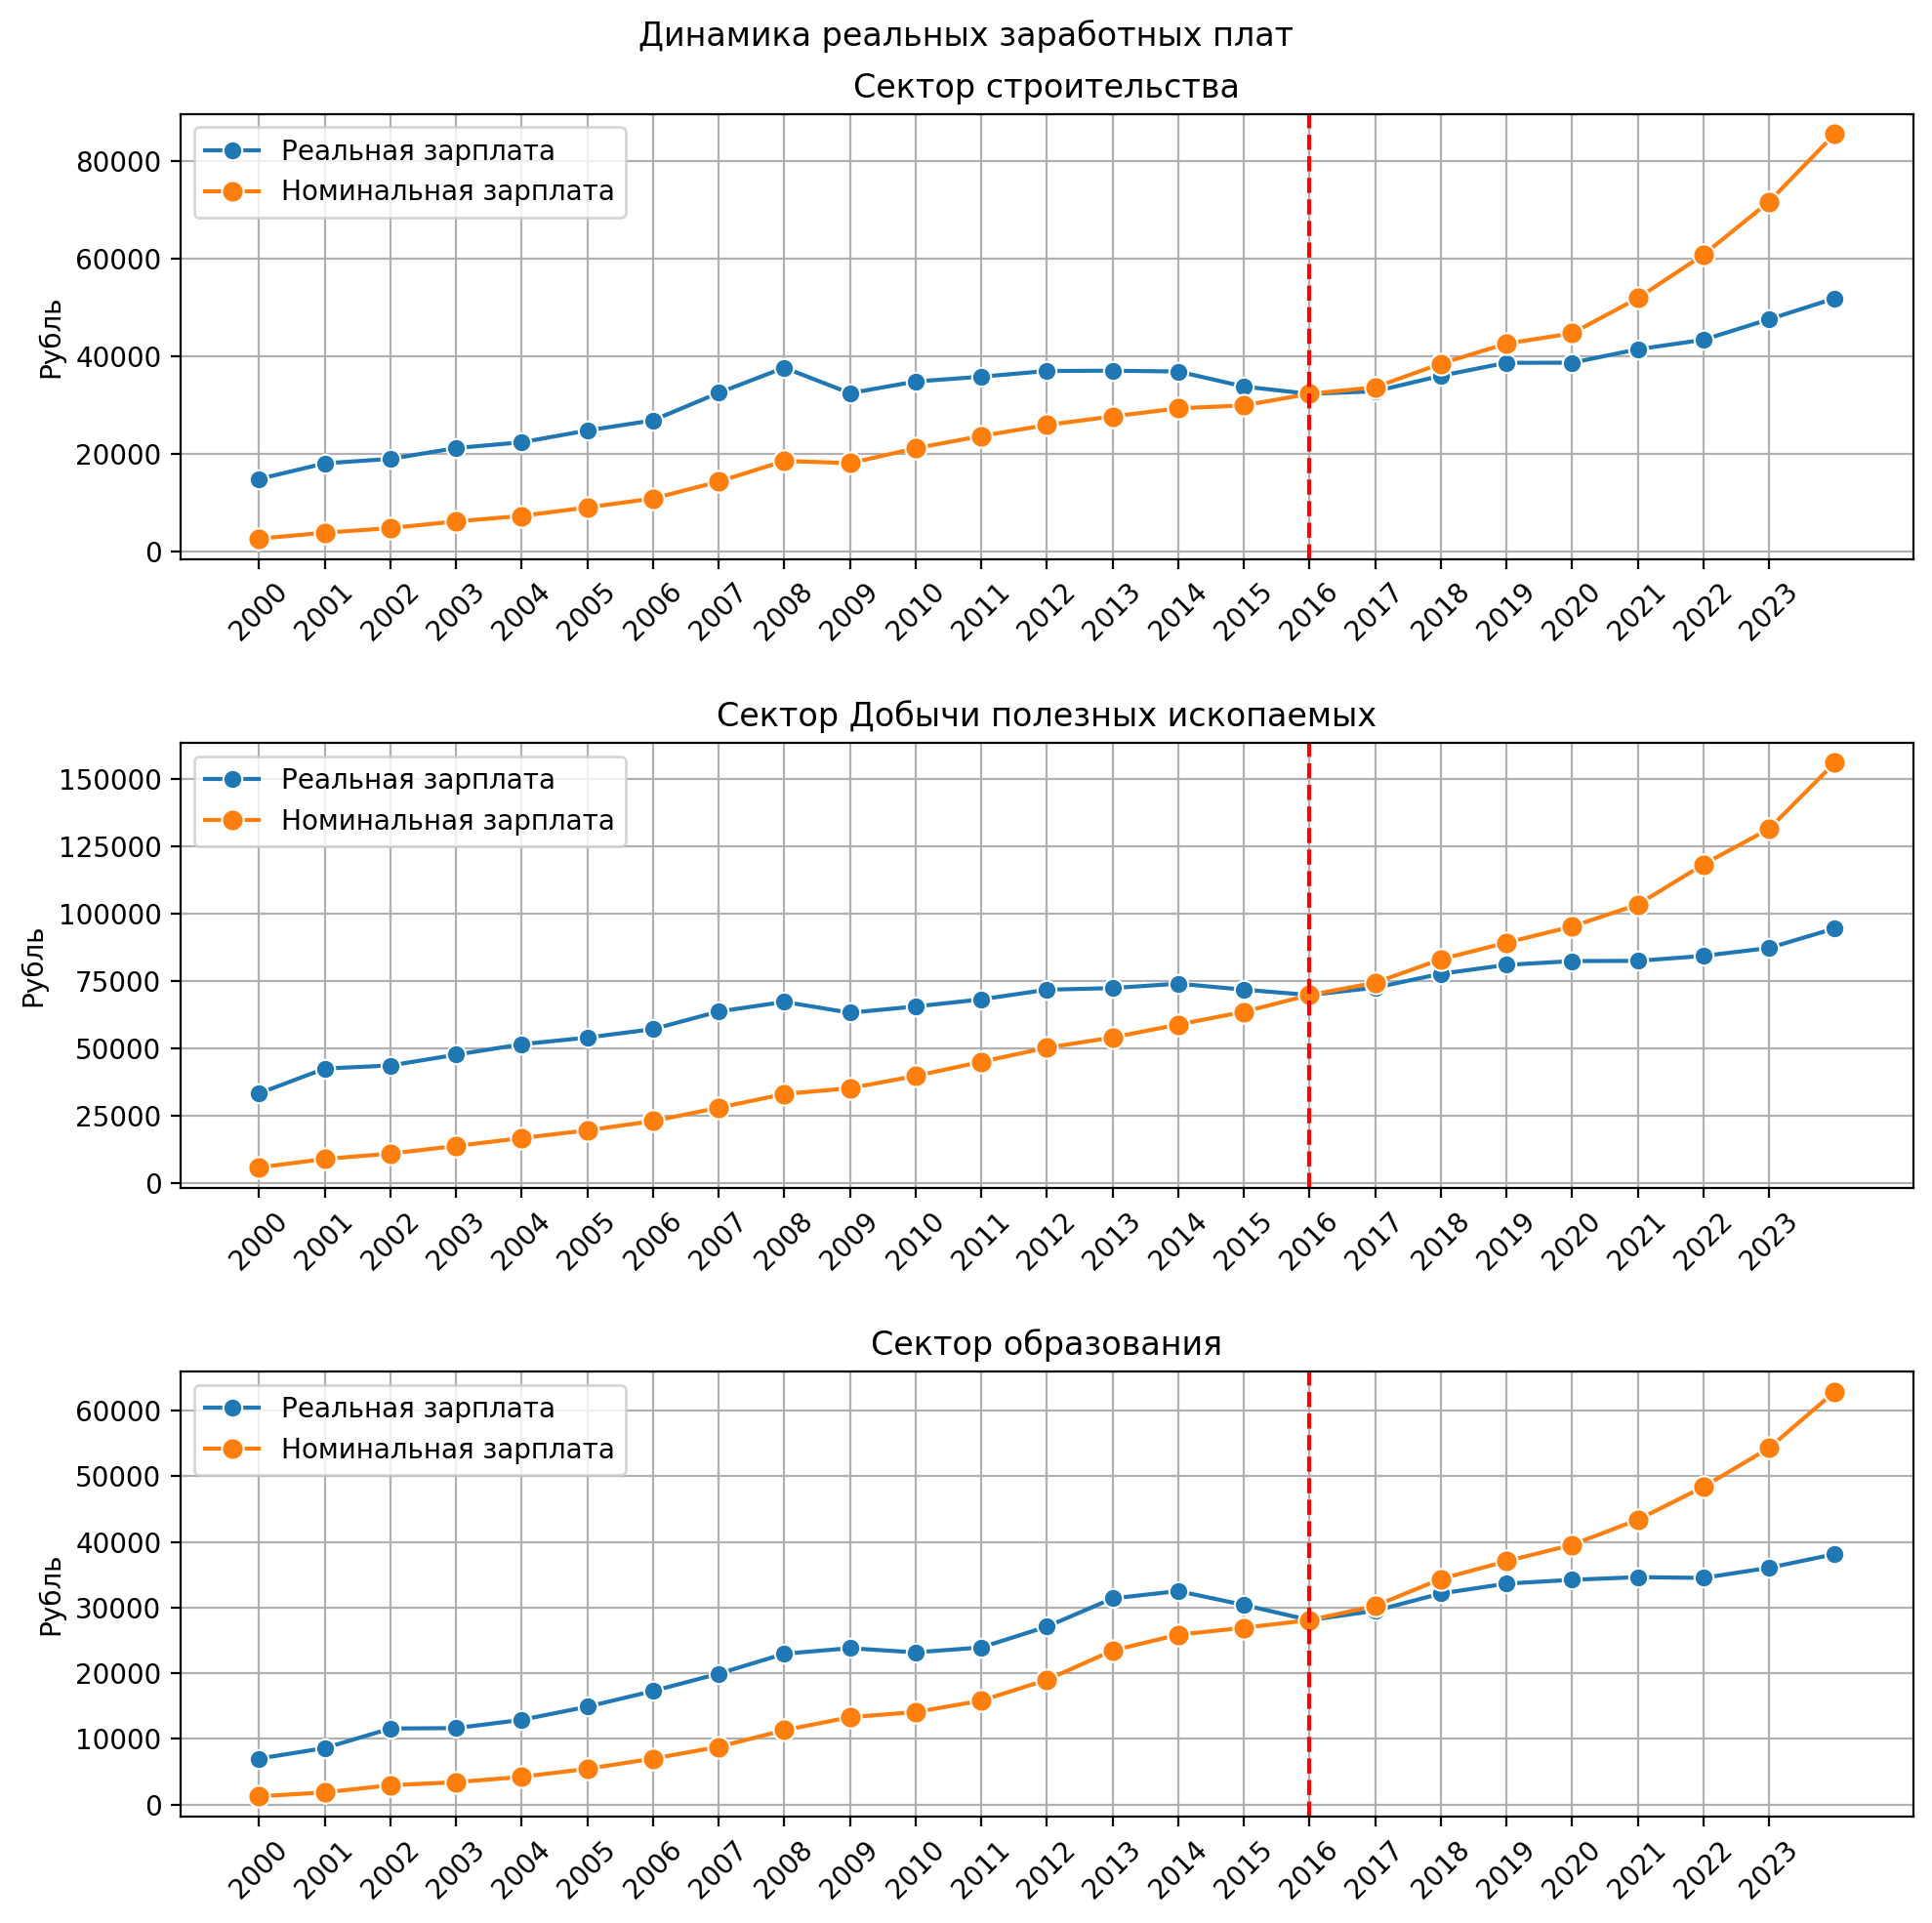

In [65]:
vars = [['Construction_adj', 'Строительство'], 
        ['Minearal_mining_adj', 'Добыча полезных ископаемых'], 
        ['Education_adj', 'Образование']]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10), dpi=200)
titles = ['Сектор строительства', 
          'Сектор Добычи полезных ископаемых', 
          'Сектор образования']

for i, (var_adj, var_nom) in enumerate(vars):
    sns.lineplot(data=salary, x='year', y=var_adj, ax=axes[i], label='Реальная зарплата', marker='o',
        markersize=7)
    sns.lineplot(data=salary, x='year', y=var_nom, ax=axes[i], label='Номинальная зарплата', marker='o',  # Точки на каждом значении
        markersize=8)
    
    axes[i].set_ylabel('Рубль')
    axes[i].set_xlabel('')
    axes[i].set_title(titles[i])
    axes[i].set_xticks(np.arange(2000, 2024, 1))
    axes[i].grid()
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].axvline(2016, color='r', linestyle='--')
    

fig.suptitle('Динамика реальных заработных плат')
plt.tight_layout(h_pad=2.0)

### Выводы:
Можно констатировать, что в секторе строительства на протяжении 2009-2014 наблюдалась стагнация реального объёма заработных плат в ценах 2016 года. С 2015 по 2017 даже наюлюдалось небольшое падение реального уровня заработных плат, что неудивительно учитывая криз в российской экономике из-за резкого снижения цен на нефть. 
В секторе добычи полезных ископаемых также на протяжении с 2010 по 2014 наблюдалсь стагнация реального уровня заработной платы. 
В тоже время в секторе образования в период с 2010 по 